# Python Outlier Detection (PyOD)
https://github.com/yzhao062/pyod

pip install --upgrade pyod

## Implemented Algorithms
PyOD toolkit consists of three major functional groups:

### (i) Individual Detection Algorithms :

#### Linear Model

PCA  
MCD  
OCSVM

#### Proximity-Based

LOF  
COF  
LOCI  
HBOS  
KNN  
AvgKNN  
MedKNN  
SOD  

#### Probabilistic

ABOD  
FastABOD  
SOS  


#### Outlier Ensembles
IForest  
LSCP  
XGBOD  

#### Neural Networks
AutoEncoder  
SO_GAAL  
MO_GAAL

### (ii) Outlier Ensembles & Outlier Detector Combination Frameworks:

Average	Simple combination by averaging the scores  
Weighted Average	Simple combination by averaging the scores with detector weights  
Maximization	Simple combination by taking the maximum scores  
AOM	Average of Maximum  
MOA	Maximization of Average

### (iii) Utility Functions:

Type	Name	Function	Documentation  
Data	generate_data	Synthesized data generation; normal data is generated by a multivariate Gaussian and outliers are generated by a uniform distribution  
Data	generate_data_clusters	Synthesized data generation in clusters; more complex data patterns can be created with multiple clusters	generate_data_clusters
Stat	wpearsonr	Calculate the weighted Pearson correlation of two samples  
Utility	get_label_n	Turn raw outlier scores into binary labels by assign 1 to top n outlier scores  
Utility	precision_n_scores	calculate precision @ rank n  

# examples

## benchmark
https://github.com/yzhao062/pyod/blob/master/notebooks/benchmark.py

## knn_example

In [1]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [6]:
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

### Generate sample data

In [2]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=14)

In [4]:
X_train[:5]

array([[8.13468655, 7.94399956],
       [6.44831823, 8.11200451],
       [6.83784772, 8.16343356],
       [7.56785715, 8.8396045 ],
       [7.85578147, 8.01135032]])

In [5]:
y_train[:5]

array([0., 0., 0., 0., 0.])

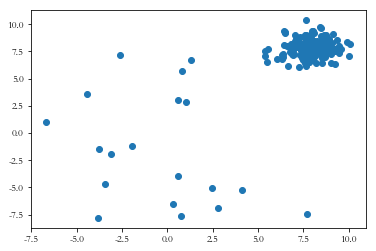

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1])

### train kNN detector

In [9]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [10]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9986, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


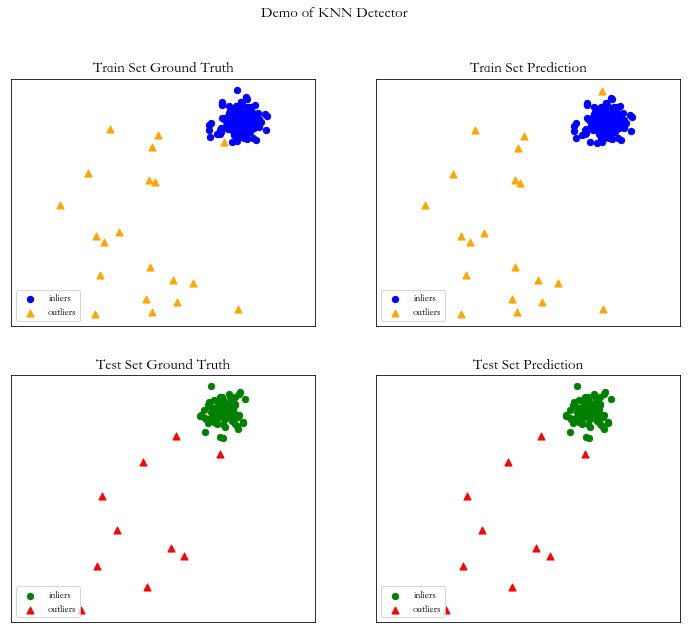

In [11]:
# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)

## iforest_example

In [12]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)



On Training Data:
IForest ROC:0.9944, precision @ rank n:0.9

On Test Data:
IForest ROC:0.9989, precision @ rank n:0.9


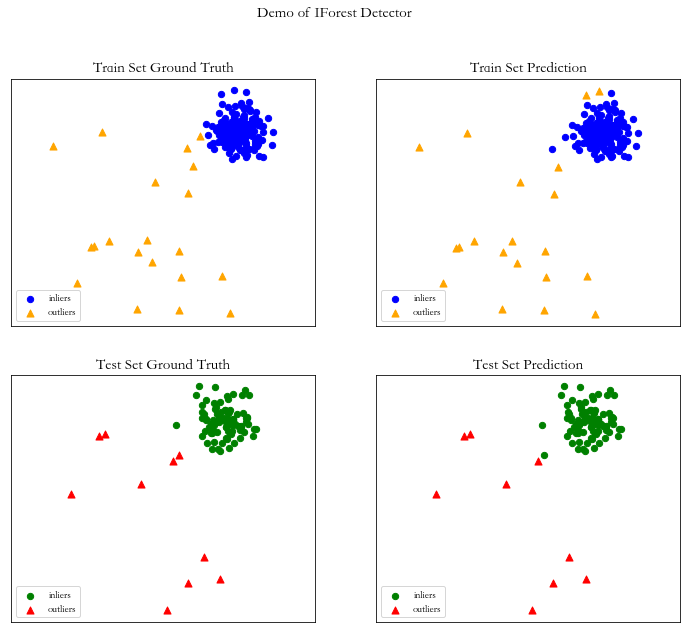

In [13]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## auto_encoder_example

In [15]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

Using TensorFlow backend.


In [16]:
contamination = 0.1  # percentage of outliers
n_train = 20000  # number of training points
n_test = 2000  # number of testing points
n_features = 300  # number of features

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

# train AutoEncoder detector
clf_name = 'AutoEncoder'
clf = AutoEncoder(epochs=30, contamination=contamination)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                19264     
_________________________________________________________________
dropout_3 (Dropout)  